In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

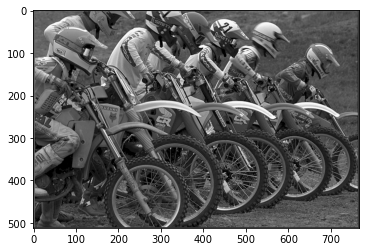

In [3]:
# Read kodim image
kodim = cv2.imread('../../images/kodim05.png', 0)
plt.imshow(kodim, cmap = 'gray')
plt.show()

In [4]:
from numpy.lib.stride_tricks import as_strided as ast

# Read the array as a set of blocks
def block_view(A, block= (3, 3)):
    shape = (int(A.shape[0]/ block[0]), int(A.shape[1]/ block[1]))+ block
    strides = (block[0]* A.strides[0], block[1]* A.strides[1])+ A.strides
    return ast(A, shape = shape, strides= strides)

In [5]:
# Apply a function to each block of an image
def blkproc(I,block_size,fun):
    J = np.copy(I)
    BJ = block_view(J,block_size)
    for n in range(BJ.shape[0]):
        for m in range(BJ.shape[1]):
            BJ[n,m] = fun(BJ[n,m])
    return J

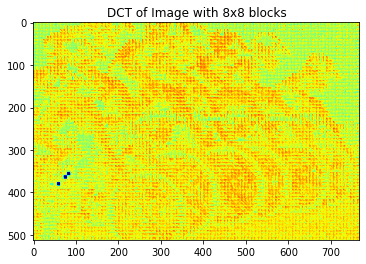

In [8]:
size = 8
kodim_blocked = blkproc(np.array(kodim, dtype=np.float32), (size,size), cv2.dct)
plt.imshow(np.log(0.0001 + np.abs(kodim_blocked)), cmap="jet")
plt.title("DCT of Image with 8x8 blocks")
plt.show()

In [9]:
def PSNR(image_1, image_2):
    size = image_1.shape
    MSE_array = (image_1 - image_2) ** 2
    MSE = MSE_array.sum() / (size[0] * size[1])
    PSNR = 10 * np.log(255 ** 2 / MSE)
    return PSNR

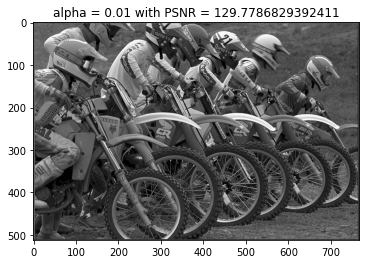

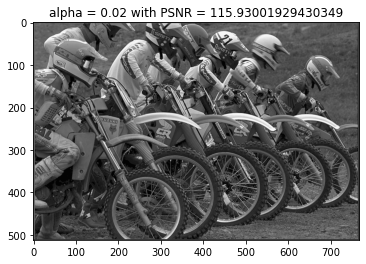

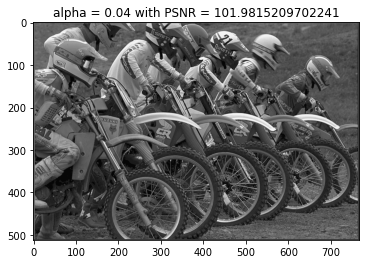

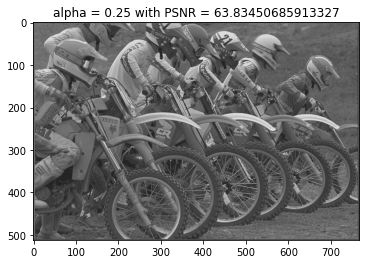

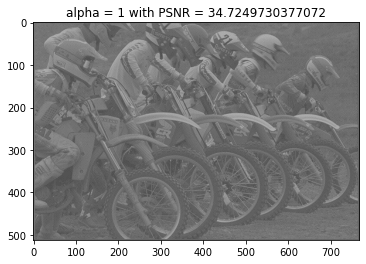

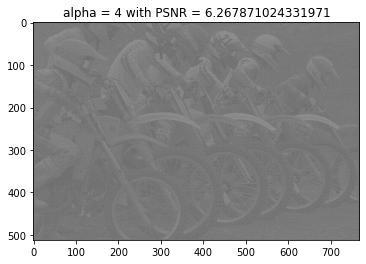

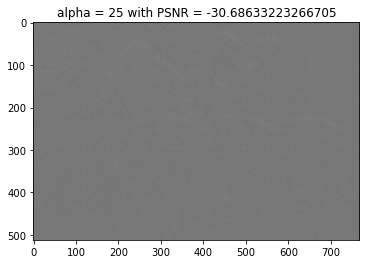

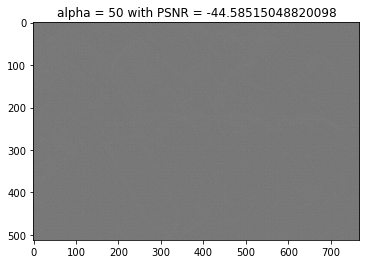

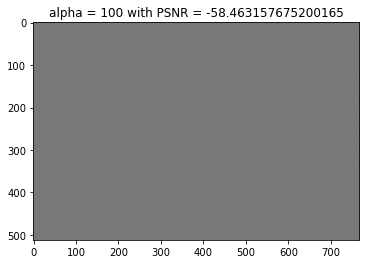

In [10]:
Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
              [12, 12, 14, 19, 26, 58, 60, 55],
              [14, 13, 16, 24, 40, 57, 69, 56],
              [14, 17, 22, 29, 51, 87, 80, 62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113, 92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100, 103, 99]])

alphas = [1/100, 1/50, 1/25, 1/4, 1, 4, 25, 50, 100]
for alpha in alphas:
    fun = lambda x: x//(Q*alpha)
    kodim_quantized = blkproc(np.array(kodim_blocked, dtype=np.float32), (8, 8), fun)
    
    fun = lambda x: x*Q*alpha
    kodim_rec_J = blkproc(np.array(kodim_quantized, dtype=np.float32), (8, 8), fun)
    
    kodim_rec = blkproc(np.array(kodim_rec_J, dtype=np.float32), (8, 8), cv2.idct)
    
    plt.imshow(kodim_rec, cmap = 'gray')
    plt.title(f'alpha = {alpha} with PSNR = {PSNR(kodim, kodim_rec)}')
    plt.show()
    
